In [4]:
import sys

!{sys.executable} -m pip install textblob
!{sys.executable} -m pip install vaderSentiment
!{sys.executable} -m pip install jellyfish
!{sys.executable} -m pip install langdetect
!{sys.executable} -m pip install spacy

!python3 -m spacy download en_core_web_sm
!{sys.executable} -m pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz
!python3 -m textblob.download_corpora

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Apps > Advanced app settings > App execution aliases.


     ---------------------------------------- 0.0/13.7 MB ? eta -:--:--
     -- ------------------------------------- 0.8/13.7 MB 6.5 MB/s eta 0:00:02
     ------ --------------------------------- 2.4/13.7 MB 5.9 MB/s eta 0:00:02
     ----------- ---------------------------- 3.9/13.7 MB 6.4 MB/s eta 0:00:02
     --------------- ------------------------ 5.2/13.7 MB 6.5 MB/s eta 0:00:02
     ------------------- -------------------- 6.6/13.7 MB 6.5 MB/s eta 0:00:02
     ---------------------- ----------------- 7.9/13.7 MB 6.5 MB/s eta 0:00:01
     -------------------------- ------------- 9.2/13.7 MB 6.5 MB/s eta 0:00:01
     ------------------------------- -------- 10.7/13.7 MB 6.5 MB/s eta 0:00:01
     ----------------------------------- ---- 12.1/13.7 MB 6.5 MB/s eta 0:00:01
     ---------------------------------------  13.4/13.7 MB 6.5 MB/s eta 0:00:01
     ---------------------------------------- 13.7/13.7 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing me

  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [101 lines of output]
        Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
        Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
        Using cached cymem-2.0.11-cp313-cp313-win_amd64.whl.metadata (8.8 kB)
        Using cached preshed-3.0.10-cp313-cp313-win_amd64.whl.metadata (2.5 kB)
        Using cached murmurhash-1.0.13-cp313-cp313-win_amd64.whl.metadata (2.2 kB)
        Using cached thinc-8.0.17.tar.gz (189 kB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'error'
        error: subprocess-exited-with-error
      
        Ã— pip subprocess to install build dependencies did not run successfully.
        â”‚ exit code: 1
        â•°â”€> [72 lines of output]
              Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
         

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7, 6

from copy import deepcopy
import seaborn as sns

import sys
sys.path.append('./utils')
from utils import review_feature
rf = review_feature()
%matplotlib inline

In [6]:
df = pd.read_csv('./data/train.csv')

In [7]:
df

,product,answer_option,label
0,Accucheck,Fast and accurate delivery,0
1,Accucheck,As usual it is genuine,0
2,Accucheck,Behavior of delivery boy is very bad. Delivery...,0
3,Accucheck,fwegwrqdsdvwfg,0
4,Accucheck,These strips were as per my requirment,0
...,...,...,...
1670,Accucheck,Ft GM,0
1671,Accucheck,I like,0
1672,Accucheck,Nice price with long expiry,0
1673,Accucheck,Price & Service,0


The objective of this analysis is to determine, for each product, the number of informative reviews (those that provide meaningful, relevant, or detailed content) and non-informative reviews (those that lack depth, context, or useful insight).



In [8]:
label_analysis = pd.crosstab(df['product'],df['label'], margins='All')
label_analysis

label,0,1,All
product,,,
Accucheck,317,85,402
Becadexamin,53,27,80
Evion,89,33,122
Neurobion,285,137,422
SevenseascodLiverOil,60,22,82
Shelcal,262,126,388
Supradyn,50,23,73
shampoo,57,49,106
All,1173,502,1675


<Axes: xlabel='product'>

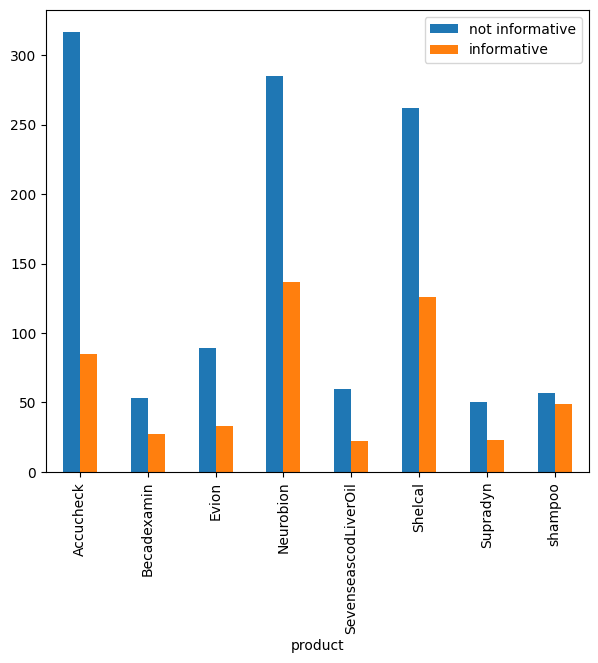

In [10]:
analysis = label_analysis.reset_index()
analysis.columns = ['product','not informative', 'informative', 'All']
analysis.iloc[:-1].plot(x="product", y=["not informative", "informative"], kind="bar")

In [11]:
analysis

,product,not informative,informative,All
0,Accucheck,317,85,402
1,Becadexamin,53,27,80
2,Evion,89,33,122
3,Neurobion,285,137,422
4,SevenseascodLiverOil,60,22,82
5,Shelcal,262,126,388
6,Supradyn,50,23,73
7,shampoo,57,49,106
8,All,1173,502,1675


## Lets check the length quality of reviews we have?

In [12]:
df['review_len'] = df['answer_option'].apply(lambda x: len(x.split()))

In [13]:
df

,product,answer_option,label,review_len
0,Accucheck,Fast and accurate delivery,0,4
1,Accucheck,As usual it is genuine,0,5
2,Accucheck,Behavior of delivery boy is very bad. Delivery...,0,20
3,Accucheck,fwegwrqdsdvwfg,0,1
4,Accucheck,These strips were as per my requirment,0,7
...,...,...,...,...
1670,Accucheck,Ft GM,0,2
1671,Accucheck,I like,0,2
1672,Accucheck,Nice price with long expiry,0,5
1673,Accucheck,Price & Service,0,3


In [14]:
checklen = []
for i in range(5,50, 5):
    checklen.append(len(df[ (df['review_len']>=i-5) & (df['review_len']<i)]))

In [15]:
checklen

[780, 602, 149, 65, 29, 22, 9, 6, 3]

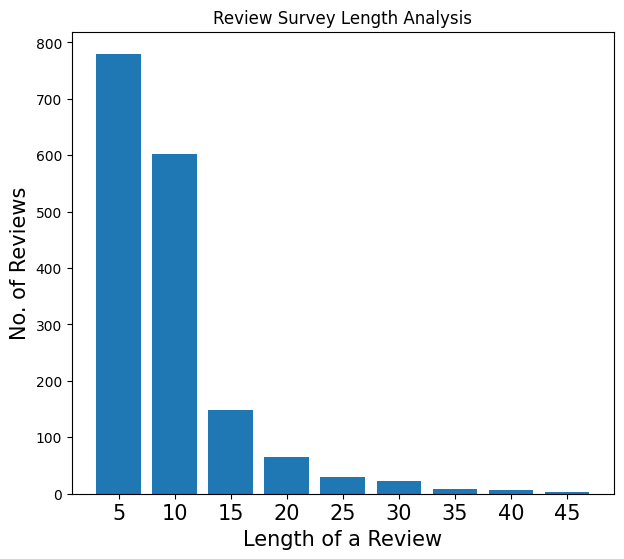

In [16]:
index = np.arange(len(checklen))
plt.bar(index, checklen)
plt.xlabel('Length of a Review', fontsize=15)
plt.ylabel('No. of Reviews', fontsize=15)
plt.xticks(index, range(5,50,5), fontsize=15)
plt.title('Review Survey Length Analysis')
plt.show()

## Stage1: Language Detection

In [17]:
bad_reviews = []
for indx in df.index:
    review = df.at[indx, 'answer_option']
    try:
        b = rf.language_detection(review)
        if b == 'hi' or b == 'mr':
            bad_reviews.append(indx)
    except:
        bad_reviews.append(indx)
        print("Language exception for:", review)

In [18]:
print("Number of Bad Reviews at Stage 1: ", len(bad_reviews))

Number of Bad Reviews at Stage 1:  2


In [19]:
df[df.index.isin(bad_reviews)]

,product,answer_option,label,review_len
898,Neurobion,अच्छा है,0,2
1109,Shelcal,साहब बहुत धाँसू गोली है साला मेरा घुटना ख़राब ...,0,23


In [20]:
df = df[~df.index.isin(bad_reviews)].reset_index(drop = True)

## Stage 2: Gibberish Reviews
+ When, we collect data from customers just out of frustation many reviews write gibberish reviews. 
+ Example: svfsfg, fsdfgdfgfsgsfgdgh, ffgrthyryj, rhrhfas, kuopip
+ We need to detection such reviews and filter thoses out.

In [21]:
bad_reviews = []
for indx in df.index:
    review = df.at[indx, 'answer_option']
    if rf.gibberish_detection(review, prefix_path = 'utils'):
        bad_reviews.append(indx)

In [22]:
print("Number of Bad Reviews at Stage 2: ", len(bad_reviews))

Number of Bad Reviews at Stage 2:  8


In [23]:
bad_reviews

[3, 82, 362, 432, 1449, 1503, 1599, 1668]

In [24]:
df[df.index.isin(bad_reviews)]

,product,answer_option,label,review_len
3,Accucheck,fwegwrqdsdvwfg,0,1
82,Accucheck,qwerwetrjy,0,1
362,Neurobion,gehryetw,0,1
432,Shelcal,gehryetw,0,1
1449,Accucheck,ghyukuyujredfehrbv,0,1
1503,Accucheck,VVV. Good,0,2
1599,Accucheck,wqwasdbggn,0,1
1668,Accucheck,Ft GM,0,2


In [25]:
df = df[~df.index.isin(bad_reviews)].reset_index(drop = True)

## Stage 3: Profanity Detection

+ At times reviewers are not happy with the delivery or service out of frustration they type profanity words in reviews. 
+ Profanity content also penalises SEO ranking
+ We decided to filter out both english and hinglish profanity reviews. 



In [26]:
bad_reviews = []
for indx in df.index:
    review = df.at[indx, 'answer_option']
    if rf.english_swear_check(review) or rf.hindi_swear_check(review):
        bad_reviews.append(indx)

In [27]:
print("Number of Bad Reviews at Stage 3: ", len(bad_reviews))

Number of Bad Reviews at Stage 3:  0


In [28]:
df[df.index.isin(bad_reviews)]

,product,answer_option,label,review_len


In [29]:
df = df[~df.index.isin(bad_reviews)].reset_index(drop = True)

In [30]:
print("Total Count of Reviews after preprocessing: ", len(df))

Total Count of Reviews after preprocessing:  1665
